In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017/downloads/did-it-rain-in-seattle-19482017.zip/1
df = pd.read_csv('./seattleWeather_1948-2017.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [3]:
data = pd.DataFrame()
data['temp_max'] = df.TMAX
data['temp_min'] = df.TMIN
data['date'] = pd.to_datetime(df.DATE)
data['precip'] = pd.to_numeric(df.PRCP)
data['above_1'] = data.precip > 1
data['above_avg'] = data.precip > 0.25
data['any_rain'] = data.precip > 0
data['prev_temp_max'] = [data.temp_max[0]] + list(data.temp_max[:-1])
data['prev_temp_min'] = [data.temp_min[0]] + list(data.temp_min[:-1])

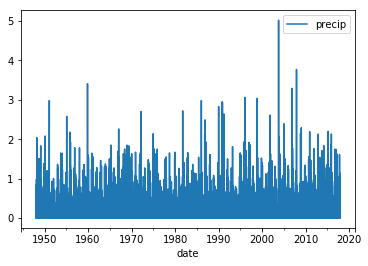

In [4]:
data.plot(x='date', y='precip')

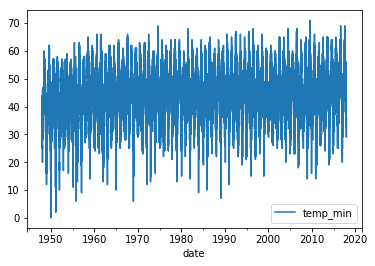

In [5]:
data.plot(x='date', y='temp_min')

In [6]:
data.describe()

,temp_max,temp_min,precip,prev_temp_max,prev_temp_min
count,25551.000000,25551.000000,25548.000000,25551.000000,25551.000000
mean,59.544206,44.514226,0.106222,59.544245,44.514461
std,12.772984,8.892836,0.239031,12.772956,8.892690
min,4.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,38.000000,0.000000,50.000000,38.000000
50%,58.000000,45.000000,0.000000,58.000000,45.000000
75%,69.000000,52.000000,0.100000,69.000000,52.000000
max,103.000000,71.000000,5.020000,103.000000,71.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 9 columns):
temp_max         25551 non-null int64
temp_min         25551 non-null int64
date             25551 non-null datetime64[ns]
precip           25548 non-null float64
above_1          25551 non-null bool
above_avg        25551 non-null bool
any_rain         25551 non-null bool
prev_temp_max    25551 non-null int64
prev_temp_min    25551 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 1.2 MB


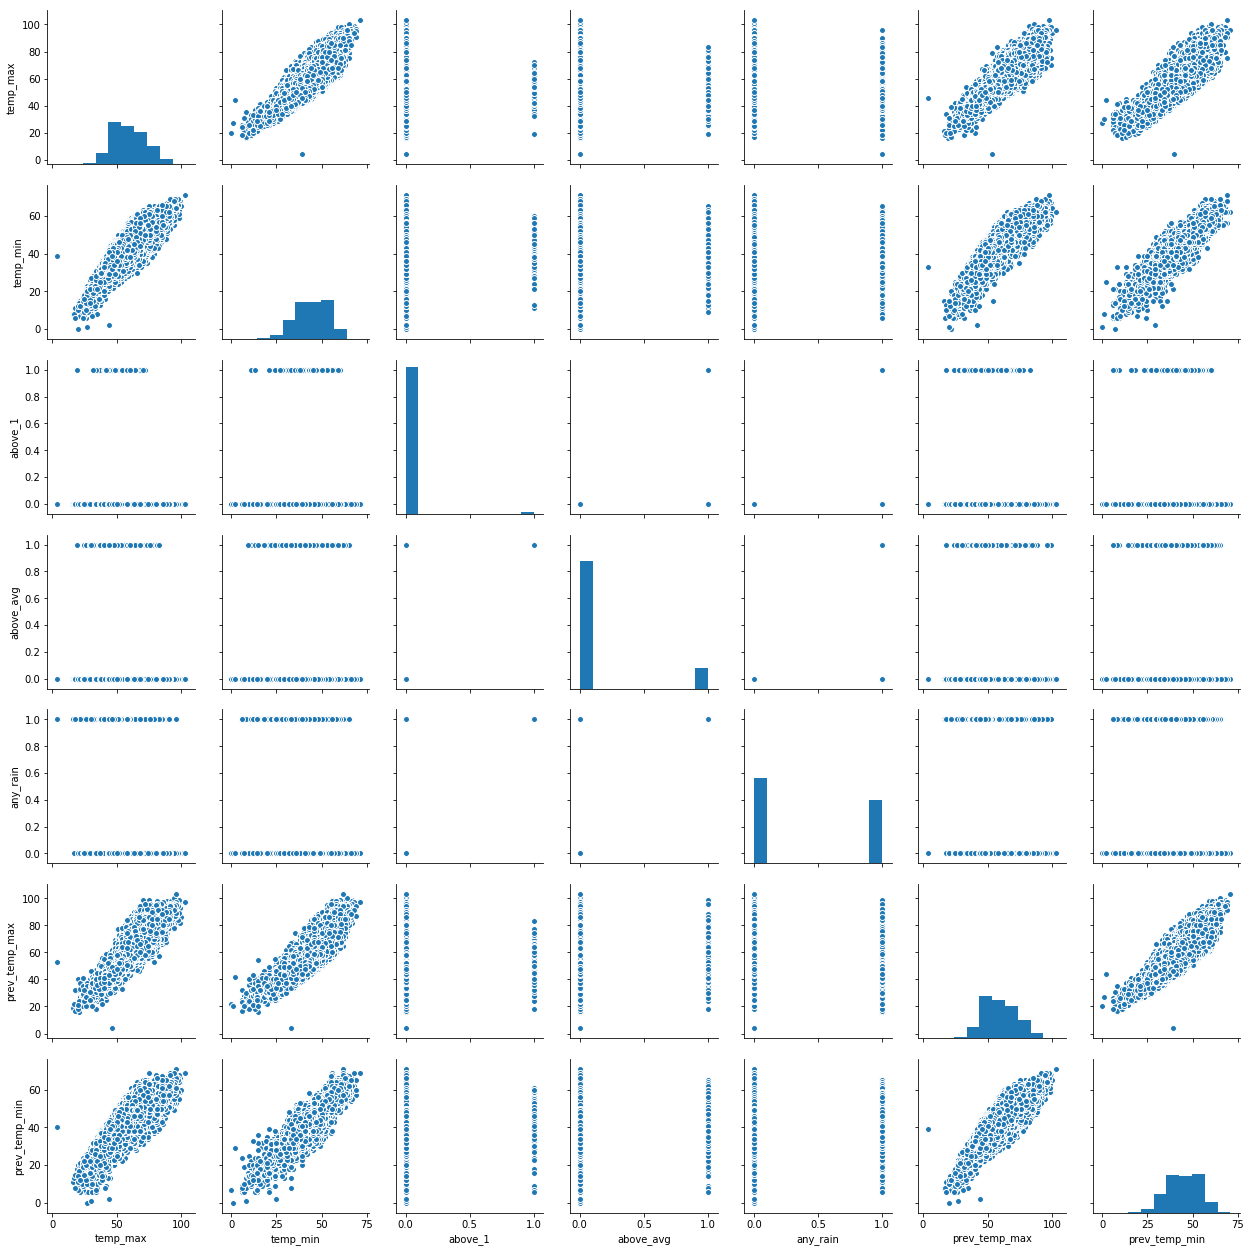

In [8]:
sbs.pairplot(data.drop(columns=['precip']))

In [9]:
X = data.drop(columns=['above_1', 'above_avg', 'any_rain'])
y_above_1 = data['above_1']
y_above_avg = data['above_avg']
y_any_rain = data['any_rain']

X_train, X_test, y_above_1_train, y_above_1_test = train_test_split(X, y_above_1, test_size=0.3, random_state=123)
X_train, X_test, y_above_avg_train, y_above_avg_test = train_test_split(X, y_above_avg, test_size=0.3, random_state=123)
X_train, X_test, y_any_rain_train, y_any_rain_test = train_test_split(X, y_any_rain, test_size=0.3, random_state=123)